In [304]:
#Exploracion de datos
import pandas as pd
import numpy as np
from google.colab import files

#
import re
from langdetect import detect
from collections import defaultdict
from wordcloud import STOPWORDS
from nltk.corpus import stopwords

# Graficos
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


#Modelo
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer





In [246]:
load=files.upload()

Saving tweets_TheBridge.csv to tweets_TheBridge (1).csv


In [14]:
pd.set_option('display.max_colwidth', None)

In [336]:
df = pd.read_csv("tweets_TheBridge.csv", index_col='date_time')
df.head()

,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,name,username,Month
date_time,,,,,,,,,,
2022-11-22 08:01:31,702077405045899264,"Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx",0,2,0,0,2,Fundación BBK | Obra Social,BBK_eus,2022-11
2022-11-22 08:05:10,702077405045899264,"Ikasi gaur etorkizuneko lanbideak, izena eman #BBKBootcamp -ean ⏩ https://t.co/xvm6ekbcMQ\n\n@TheBridge_Tech -ekin batera, Full Stack Web Garapena, Data Science, Zibersegurtasuna eta UX UI produktu digitalaren diseinuari buruz ikasteko aukera izango duzu. https://t.co/oxEOX35Osa",0,2,0,0,1,Fundación BBK | Obra Social,BBK_eus,2022-11
2022-11-22 08:18:42,783248945761910788,"Acelerando juntos el #talentodigital en España. El próximo 24 de noviembre, nuestro #CEO Juan Zamora presentará Hopla! en las instalaciones de .@TheBridge_Tech a las 17:30h. Contaremos quiénes somos, qué hacemos y cómo desarrollar una #carrerarofesional fructífera con nosotros. https://t.co/Sw9EUswIQ2",0,3,0,1,1,Hopla! Software,HoplaSoftware,2022-11
2022-11-23 10:13:36,1162694149956603904,"¡Ven a conocer los BBK bootcamps powered by @TheBridge_Tech! @BBK_eus \n\nPróximo Open Day🤗\n📅1 dic\n⏰18.30\n📍 @BBK_Kuna, Urazurrutia Kalea 3, Bilbao\n\n¡Lánzate a por una carrera digital!\n \n🎟Entradas https://t.co/NBgXWjSYcE\n\n#uxui #ciber #desarrollowebfullstack #datascience https://t.co/KFsgFfom5B",0,3,0,0,4,The Bridge,TheBridge_Tech,2022-11
2022-11-24 12:15:15,823470817963032576,🔵Acelera tu carrera digital con #BBKBootcamps.\n\nGracias a la colaboración entre @BBK_eus y @TheBridge_Tech podrás formarte con los mejores profesionales para lograr un trabajo con proyección.\n\n🔗Elige tu curso https://t.co/RxICpzj9N6\n\n#ux #developers #ciberseguridad #datascience,0,4,0,0,3,BBK network,BBKnetwork,2022-11


## Trabajo con idioma, enlaces, menciones, etc.

In [342]:
signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(http\S+)|(@\S+)|(#\S+)|(\n)|(⏩)|(🔗)|(✌️)|(🙏🏻)|(👇)|(📅)|(⏰)|(📍)|(🎟)|(🔵)|(☕️)|(🥐)|(🤝)|(⤵️)|(👏)|(ℹ️➕)|(🔙)|(👉)|(🍻)|(🗣)|(🤗)|(🤔)|(€)")
# se eliminan aquellas puntuaciones y emojis que puedan existir en el tweet
def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df['text_change'] = df['text'].apply(signs_tweets)

In [343]:
#se analiza el idioma que es cada tweet para facilitar el proceso de analisis de sentimiento
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'Desconocido'

df['lenguage'] = df['text_change'].apply(detectar_idioma)

In [346]:
df['lenguage'].unique()

array(['es', 'ek', 'en', 'Desconocido'], dtype=object)

In [345]:
df.loc[df['lenguage'].isin(['nl','id','sl']),'lenguage']='ek'
df.loc['2023-01-18 18:06:30','lenguage']='es'
df.loc[df['lenguage'].isin(['et']),'lenguage']='en'
df.loc[df['lenguage'].isin(['it', 'pt', 'fr']), 'lenguage'] = 'es'

In [348]:
# Stopwords comando que elimina aquellas palabras muy repetidas en cada idioma
nltk.download('stopwords')
# Español
spanish_stop_words = stopwords.words('spanish')

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in spanish_stop_words])
        )
        
    return removed_stop_words
df.loc[df['lenguage'].isin(['es']),'text_change']=remove_stop_words(df.loc[df['lenguage'].isin(['es']),'text_change'])

# Ingles
nltk.download('stopwords')

english_stop_words = stopwords.words('english')

def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in english_stop_words])
        )
        
    return removed_stop_words
df.loc[df['lenguage'].isin(['en']),'text_change']=remove_stop_words(df.loc[df['lenguage'].isin(['en']),'text_change'])
# No encontre stopwords para el caso del euskera

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [349]:
nltk.download('punkt')
#Contar cuantas palabras hay en cada tweet
def count_words(text):
    tokens = word_tokenize(text)
    count = len(tokens)
    return count

df['word_count'] = df['text'].apply(count_words)

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,name,username,Month,text_change,lenguage,word_count
date_time,,,,,,,,,,,,,
2022-11-22 08:01:31,702077405045899264,"Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx",0,2,0,0,2,Fundación BBK | Obra Social,BBK_eus,2022-11,aprende hoy profesiones futuro ¡inscríbete junto podrás aprender desarrollo web full stack data science ciberseguridad diseño producto digital ux ui,es,43
2022-11-22 08:05:10,702077405045899264,"Ikasi gaur etorkizuneko lanbideak, izena eman #BBKBootcamp -ean ⏩ https://t.co/xvm6ekbcMQ\n\n@TheBridge_Tech -ekin batera, Full Stack Web Garapena, Data Science, Zibersegurtasuna eta UX UI produktu digitalaren diseinuari buruz ikasteko aukera izango duzu. https://t.co/oxEOX35Osa",0,2,0,0,1,Fundación BBK | Obra Social,BBK_eus,2022-11,ikasi gaur etorkizuneko lanbideak izena eman -ean -ekin batera full stack web garapena data science zibersegurtasuna eta ux ui produktu digitalaren diseinuari buruz ikasteko aukera izango duzu,ek,43
2022-11-22 08:18:42,783248945761910788,"Acelerando juntos el #talentodigital en España. El próximo 24 de noviembre, nuestro #CEO Juan Zamora presentará Hopla! en las instalaciones de .@TheBridge_Tech a las 17:30h. Contaremos quiénes somos, qué hacemos y cómo desarrollar una #carrerarofesional fructífera con nosotros. https://t.co/Sw9EUswIQ2",0,3,0,1,1,Hopla! Software,HoplaSoftware,2022-11,acelerando juntos españa próximo noviembre juan zamora presentará hopla instalaciones h contaremos quiénes hacemos cómo desarrollar fructífera,es,52
2022-11-23 10:13:36,1162694149956603904,"¡Ven a conocer los BBK bootcamps powered by @TheBridge_Tech! @BBK_eus \n\nPróximo Open Day🤗\n📅1 dic\n⏰18.30\n📍 @BBK_Kuna, Urazurrutia Kalea 3, Bilbao\n\n¡Lánzate a por una carrera digital!\n \n🎟Entradas https://t.co/NBgXWjSYcE\n\n#uxui #ciber #desarrollowebfullstack #datascience https://t.co/KFsgFfom5B",0,3,0,0,4,The Bridge,TheBridge_Tech,2022-11,¡ven conocer bbk bootcamps powered by próximo open day dic urazurrutia kalea bilbao¡lánzate carrera digital entradas,es,50
2022-11-24 12:15:15,823470817963032576,🔵Acelera tu carrera digital con #BBKBootcamps.\n\nGracias a la colaboración entre @BBK_eus y @TheBridge_Tech podrás formarte con los mejores profesionales para lograr un trabajo con proyección.\n\n🔗Elige tu curso https://t.co/RxICpzj9N6\n\n#ux #developers #ciberseguridad #datascience,0,4,0,0,3,BBK network,BBKnetwork,2022-11,acelera carrera digital gracias colaboración podrás formarte mejores profesionales lograr trabajo proyecciónelige curso,es,45


#### DataFrame a modelar
Una vez terminado de trabajar con todo el Dataframe nos quedamos con varias columnas, la mas importante siendo `text_change` que nos facilitara el modelado via `Textblob` ya que ha perdido mucho del ruido que podria haber dificultado antes

## Graficos


In [355]:
df_best_tweet=df.sort_values(by=['impression_count','like_count','quote_count','reply_count','retweet_count'], ascending=[False,False,False,False,False])
df_best_tweet.iloc[0]
# se ordena por importancia del tweet

id                                                                                                                                                                                                                                                                                                                        41545659
text                Advanced #Cynefin, Estuarine mapping &amp; EUFG Masterclass (Madrid) https://t.co/H5ZSjbKHAr | Los interesados en la aplicación de las ciencias de la complejidad en nuestro país tendremos la oportunidad de aprender de @snowded en persona el 16/3/23 en la sede de @TheBridge_Tech https://t.co/LavCfgYIht
impression_count                                                                                                                                                                                                                                                                                                            225761
like_count                     

#### Tweet con mayor repercusion
Fue hecho por el usuario `Mario Lopez de Avila` con un total de `225 761` visualizaciones y fue hecho el `2023-01-15 13:16:23`.
lo curioso que el segundo tweet mas influyente fue hecho por el usuario `Javier G. Recuenco` con un total de `6600` visualizaciones y fue hecho el `2023-01-18 18:06:30`

In [312]:
top_10_usernames = pd.DataFrame(df['username'].value_counts().head(5))
top_10_usernames=top_10_usernames.reset_index()
top_10_usernames

,index,username
0,BBK_eus,22
1,jorgegrev,11
2,TheBridge_Tech,7
3,Metricool_es,5
4,nodosenlared,5


Text(0.5, 1.0, 'Usuarios con mas menciones')

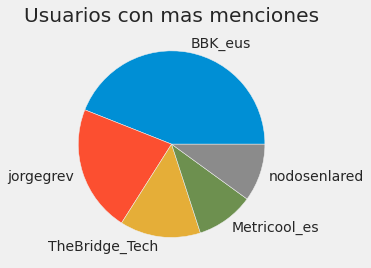

In [329]:
top_10_usernames.plot("index", "username", kind="pie", legend=False, labels=top_10_usernames['index'] )
plt.ylabel("")
plt.title("Usuarios con mas menciones")

#### Usuarios con mas menciones
 Se puede ver que el grafico solo posee 5 usuarios, eso es debido a que solo se escogieron solo aquellos con mayor numero de menciones, siendo el claro ganador el usuario BBK_eus con un total de 22 menciones en el transcurso de estos 5 meses ocupando entre los tops 5 un total del 44%.

Text(0.5, 1.0, 'Tweets por mes')

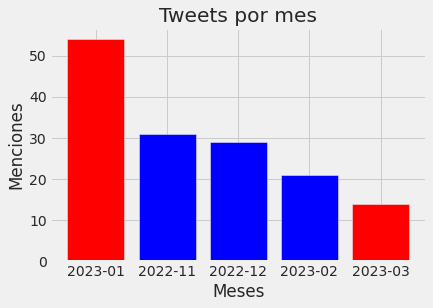

In [314]:
df_months=pd.DataFrame(df['Month'].value_counts())
df_months=df_months.reset_index()

plt.bar(df_months['index'],df_months['Month'], color=['red', 'blue', 'blue','blue', 'red'])

plt.xlabel("Meses")
plt.ylabel("Menciones")
plt.title("Tweets por mes")

In [360]:
df_months

,index,Month
0,2023-01,54
1,2022-11,31
2,2022-12,29
3,2023-02,21
4,2023-03,14


#### Grafica Tweets por meses
Se puede ve que en la gráfica anterior que el mes en el cual hubo mas menciones a `@TheBridge_Tech`fue en enero del 2023 mientras que el mes con menos menciones fue en marzo del mismo año, esto debido que a día de hoy `10/03/2023` aun no termina marzo por lo que no se cuentan con los datos completos del mes

<AxesSubplot:xlabel='lenguage', ylabel='count'>

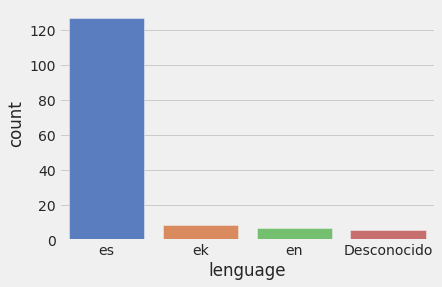

In [321]:
sns.countplot(x="lenguage", data=df, palette='muted')

#### Grafica por idiomas
mientras se trabajaba con los tweets dimos con el hallazgo que los tweets se encontraban en distintos idiomas:
- Español
- Ingles
- Euskera

Nos obligo a tomar un enfoque distinto a la hora del analisis de sentimiento. El "Idioma" desconocido son todos aquellos tweets que solo se conformaban por menciones y nada de texto.


In [332]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]
    
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace 

In [350]:
freq_dict = defaultdict(int)
for sent in df.loc[df['lenguage'].isin(['en']),'text_change']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

freq_dict = defaultdict(int)
for sent in df.loc[df['lenguage'].isin(['es']),'text_change']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'red')

freq_dict = defaultdict(int)
for sent in df.loc[df['lenguage'].isin(['ek']),'text_change']:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(50), 'green')



fig = tools.make_subplots(rows=1, cols=3, vertical_spacing=0.04,
                          subplot_titles=["palabaras mas usadas ingles", 
                                          "palabaras mas usadas español",
                                          "palabaras mas usadas euskera"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig['layout'].update(height=1200, width=1100, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

/usr/local/lib/python3.9/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#### Frecuencia de palabras
se puede ver que la palabra más usadas por idioma son:
- `Ingles`: bbk
- `Español`: digital
- `Euskera`: eta

se puede ver que en euskera que la palabra mas usada  es eta que en español significaria y , esto se debe a que no se puedo usar stopwords a los tweets en euskera.

In [327]:
df_para_cor=df.drop(['id','polarity'],axis=1)

<AxesSubplot:>

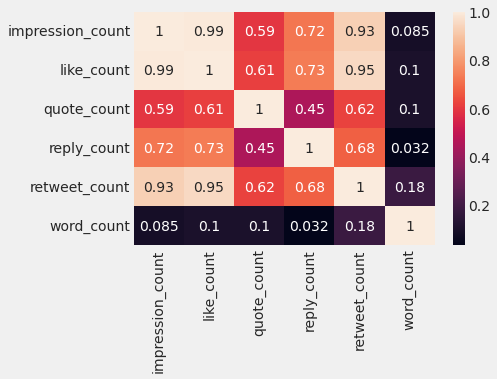

In [328]:
sns.heatmap(df_para_cor.corr(),annot=True)

#### Gráfico de correlaciones
En este grafico podemos  ver que entre todas la variables que pertenecen a metrics existe una gran correlacion siendo la menor de `0.45` y como el numero de plabras no influye en las metricassiendo la mayor de `0.1`

## Modelo preentrenado Textblob


In [365]:

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

polaridad_es=[]
polaridad_en=[]
polaridad_ek=[]


for i in df.loc[df['lenguage'].isin(['es']), 'text_change']:
  polaridad=get_polarity(i)
  polaridad_es.append(polaridad)

for i in df.loc[df['lenguage'].isin(['en']), 'text_change']:
  polaridad=get_polarity(i)
  polaridad_en.append(polaridad)

for i in df.loc[df['lenguage'].isin(['ek']), 'text_change']:
  polaridad=get_polarity(i)
  polaridad_ek.append(polaridad)

In [357]:
from pandas.io.formats.format import DataFrameRenderer

# ESPAÑOL
df.loc[df['lenguage'] == 'es', 'polarity'] = polaridad_es

sentimiento_es=[]
for a in polaridad_es:
  if a <0:
    sentimiento_es.append('Negative')
  elif a == 0 :
    sentimiento_es.append('Neutral')
  else:
    sentimiento_es.append('Positive')
df.loc[df['lenguage'] == 'es', 'Sentiment']= sentimiento_es

# INGLES
df.loc[df['lenguage'] == 'en', 'polarity'] = polaridad_en

sentimiento_en=[]
for a in polaridad_en:
  if a <0:
    sentimiento_en.append('Negative')
  elif a == 0 :
    sentimiento_en.append('Neutral')
  else:
    sentimiento_en.append('Positive')
df.loc[df['lenguage'] == 'en', 'Sentiment']= sentimiento_en

# EUSKERA
df.loc[df['lenguage'] == 'ek', 'polarity'] = polaridad_ek

sentimiento_ek=[]
for a in polaridad_ek:
  if a <0:
    sentimiento_ek.append('Negative')
  elif a == 0 :
    sentimiento_ek.append('Neutral')
  else:
    sentimiento_ek.append('Positive')
df.loc[df['lenguage'] == 'ek', 'Sentiment']= sentimiento_ek

In [358]:
df.head()

,id,text,impression_count,like_count,quote_count,reply_count,retweet_count,name,username,Month,text_change,lenguage,word_count,polarity,Sentiment
date_time,,,,,,,,,,,,,,,
2022-11-22 08:01:31,702077405045899264,"Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx",0,2,0,0,2,Fundación BBK | Obra Social,BBK_eus,2022-11,aprende hoy profesiones futuro ¡inscríbete junto podrás aprender desarrollo web full stack data science ciberseguridad diseño producto digital ux ui,es,43,0.175,Positive
2022-11-22 08:05:10,702077405045899264,"Ikasi gaur etorkizuneko lanbideak, izena eman #BBKBootcamp -ean ⏩ https://t.co/xvm6ekbcMQ\n\n@TheBridge_Tech -ekin batera, Full Stack Web Garapena, Data Science, Zibersegurtasuna eta UX UI produktu digitalaren diseinuari buruz ikasteko aukera izango duzu. https://t.co/oxEOX35Osa",0,2,0,0,1,Fundación BBK | Obra Social,BBK_eus,2022-11,ikasi gaur etorkizuneko lanbideak izena eman -ean -ekin batera full stack web garapena data science zibersegurtasuna eta ux ui produktu digitalaren diseinuari buruz ikasteko aukera izango duzu,ek,43,0.350,Positive
2022-11-22 08:18:42,783248945761910788,"Acelerando juntos el #talentodigital en España. El próximo 24 de noviembre, nuestro #CEO Juan Zamora presentará Hopla! en las instalaciones de .@TheBridge_Tech a las 17:30h. Contaremos quiénes somos, qué hacemos y cómo desarrollar una #carrerarofesional fructífera con nosotros. https://t.co/Sw9EUswIQ2",0,3,0,1,1,Hopla! Software,HoplaSoftware,2022-11,acelerando juntos españa próximo noviembre juan zamora presentará hopla instalaciones h contaremos quiénes hacemos cómo desarrollar fructífera,es,52,0.000,Neutral
2022-11-23 10:13:36,1162694149956603904,"¡Ven a conocer los BBK bootcamps powered by @TheBridge_Tech! @BBK_eus \n\nPróximo Open Day🤗\n📅1 dic\n⏰18.30\n📍 @BBK_Kuna, Urazurrutia Kalea 3, Bilbao\n\n¡Lánzate a por una carrera digital!\n \n🎟Entradas https://t.co/NBgXWjSYcE\n\n#uxui #ciber #desarrollowebfullstack #datascience https://t.co/KFsgFfom5B",0,3,0,0,4,The Bridge,TheBridge_Tech,2022-11,¡ven conocer bbk bootcamps powered by próximo open day dic urazurrutia kalea bilbao¡lánzate carrera digital entradas,es,50,0.000,Neutral
2022-11-24 12:15:15,823470817963032576,🔵Acelera tu carrera digital con #BBKBootcamps.\n\nGracias a la colaboración entre @BBK_eus y @TheBridge_Tech podrás formarte con los mejores profesionales para lograr un trabajo con proyección.\n\n🔗Elige tu curso https://t.co/RxICpzj9N6\n\n#ux #developers #ciberseguridad #datascience,0,4,0,0,3,BBK network,BBKnetwork,2022-11,acelera carrera digital gracias colaboración podrás formarte mejores profesionales lograr trabajo proyecciónelige curso,es,45,0.000,Neutral


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

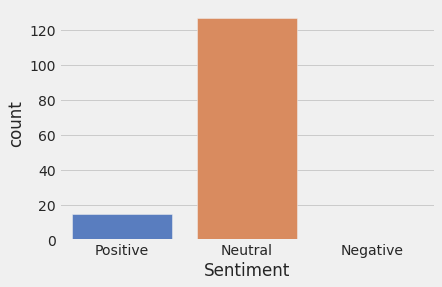

In [359]:
sns.countplot(x="Sentiment", data=df, palette='muted')

<AxesSubplot:>

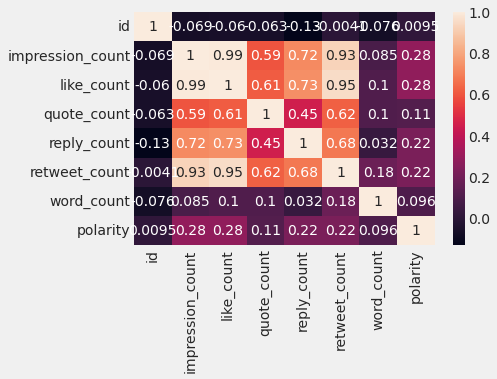

In [366]:
sns.heatmap(df.corr(),annot=True)

#### Prediccion de sentimientos
Podemos ver como el sentimiento que resalta más es el neutral, y como el siguiente a este es el positivo. Esto se puede deber a que antes que ser tweets en donde se habla del bootcamp son tweets publicitarios en donde solo se brinda informacion de los cursos.

In [384]:
username = "admin"
password = "Yacueyur11"
host = "database-1.cz9bd62npldw.us-east-2.rds.amazonaws.com" 
port = 3306

In [369]:
import pymysql

In [393]:

db = pymysql.connect(host = host,
                     user = username,
                     password = password,
                     cursorclass = pymysql.cursors.DictCursor
)

# El objeto cursor es el que ejecutará las queries y devolverá los resultados

cursor = db.cursor()

In [394]:
create_db = '''CREATE DATABASE twitter_database'''
cursor = db.cursor()
cursor.execute(create_db)

ProgrammingError: ignored

In [395]:
cursor.execute("USE twitter_database")

0

In [396]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
                       .format(user=username,
                               pw=password,
                               host=host,
                               db='twitter_database'))

In [397]:
df.to_sql(name='twitter', con=engine, if_exists='append', index=False)

In [398]:
sql = '''SELECT * FROM twitter'''
cursor.execute(sql)
mi_tabla = cursor.fetchall()
print(mi_tabla)

[{'id': 702077405045899264, 'text': 'Aprende hoy las profesiones del futuro, ¡inscríbete en el #BBKBootcamp ⏩ https://t.co/uJcCKObkPz\n\nJunto con @TheBridge_Tech podrás aprender sobre Desarrollo Web Full Stack, Data Science, Ciberseguridad y Diseño de producto digital UX UI. https://t.co/wdbmRphsAx', 'impression_count': 0, 'like_count': 2, 'quote_count': 0, 'reply_count': 0, 'retweet_count': 2, 'name': 'Fundación BBK | Obra Social', 'username': 'BBK_eus', 'Month': '2022-11', 'text_change': 'aprende hoy profesiones futuro ¡inscríbete junto podrás aprender desarrollo web full stack data science ciberseguridad diseño producto digital ux ui', 'lenguage': 'es', 'word_count': 43, 'polarity': 0.175, 'Sentiment': 'Positive'}, {'id': 702077405045899264, 'text': 'Ikasi gaur etorkizuneko lanbideak, izena eman #BBKBootcamp -ean ⏩ https://t.co/xvm6ekbcMQ\n\n@TheBridge_Tech -ekin batera,  Full Stack Web Garapena, Data Science, Zibersegurtasuna eta UX UI produktu digitalaren diseinuari buruz ikastek

In [399]:
db.commit()

In [400]:
db.close()

In [401]:
engine.dispose()